# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [7]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [8]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()
ride_data_df.head()
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Deliverable 1: Get a Summary DataFrame 

In [14]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [15]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [16]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_type = total_fares_by_type / total_rides_by_type
average_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [19]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares_by_type / total_drivers_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [20]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_by_type, "Total Drivers": total_drivers_by_type, "Total Fare": total_fares_by_type, "Average Fare Per Ride": average_fare_by_type, "Average Fare Per Driver": average_fare_per_driver})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fare,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [21]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [22]:
#  8. Format the columns.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Fare"] = pyber_summary_df["Total Fare"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:.2f}".format)

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [23]:
# 1. Read the merged DataFrame
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fare,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [24]:
# 9. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df.head()
sum_of_fares_df = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
sum_of_fares_df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [25]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_of_fares_df = sum_of_fares_df.reset_index()

In [26]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_of_fares_pivot_df = sum_of_fares_df.pivot(index="date", columns = "type", values="fare")

In [27]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_of_fares_pivot_df.index = pd.to_datetime(sum_of_fares_pivot_df.index)
filtered_date_df = sum_of_fares_pivot_df.loc['2019-01-01':'2019-04-29']
filtered_date_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN
2019-04-29 23:05:04,NaN,NaN,14.59
2019-04-29 23:10:18,NaN,29.39,NaN


In [34]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resampled_df = filtered_date_df.resample("W").sum()[:-1]
resampled_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


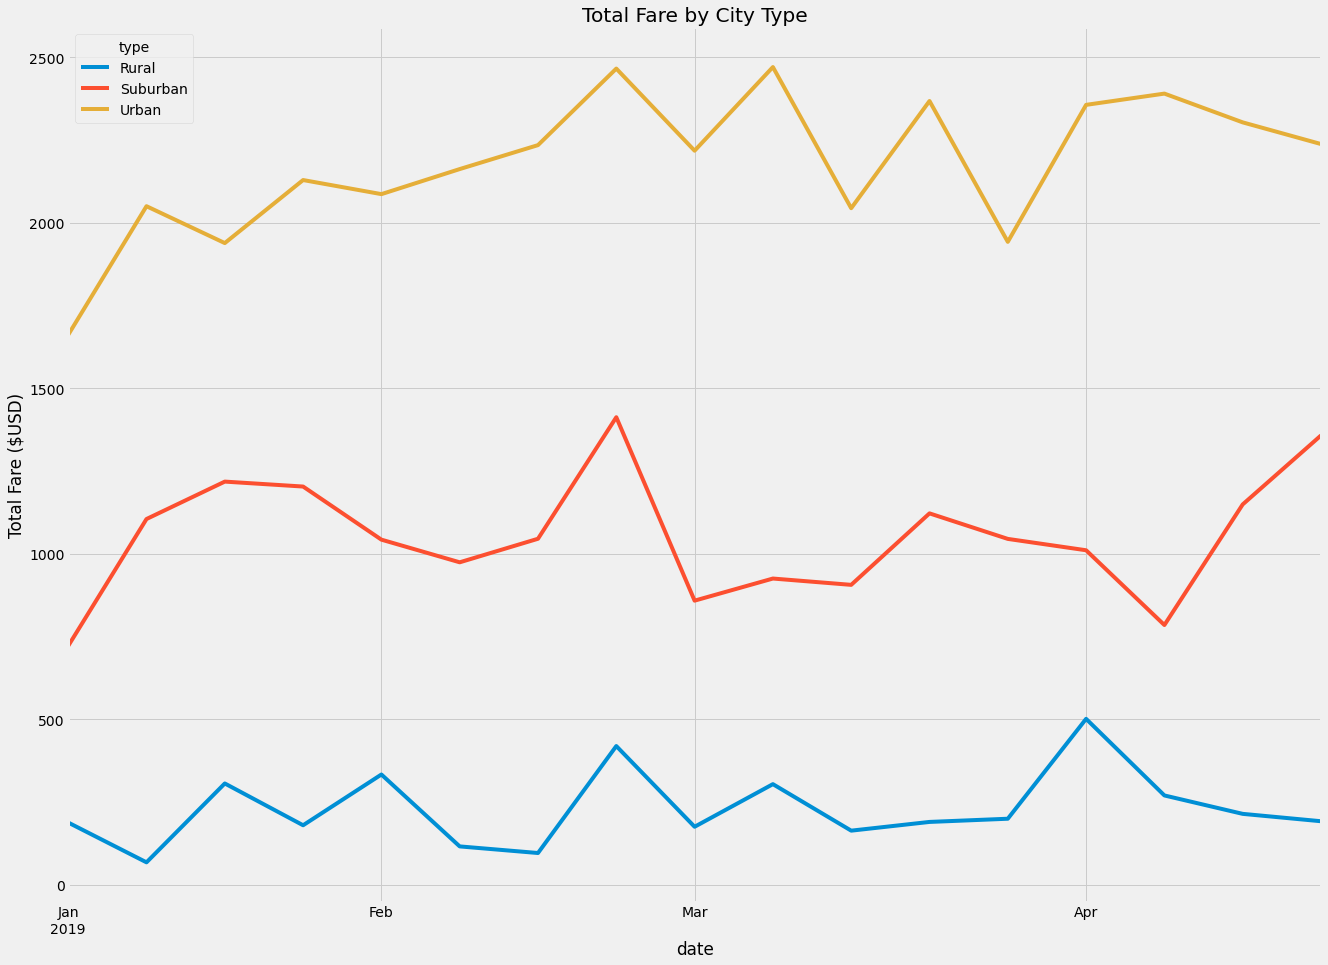

In [42]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = resampled_df.plot.line(title="Total Fare by City Type", figsize=(20,15))
ax.set_ylabel("Total Fare ($USD)")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")

#Show Figure
plt.show()

